 ## Final Exam
## Dataset
Analysis will be run on a dataset containing the statistical information of Pokemon. This is done as a demonstration to show the power of certain python packages and their utility in performing tests on data. There are 800 observations in the data sample, along with diferent markers such as generation (when the pokemon came out) which could be useful in clustering the data. By diving into this dataset any trends in the data will hopefully be uncovered.

## Data Dictionary
"#" - The pokemon's numerical pokedex number in the game files

Total - The summed total of the pokemon's stats

HP - A stat representing health in the game

Attack - A stat representing physical attack

Defense - A stat representing physical defense

Sp.Atk - A stat representing mental attack

Sp.Def - A stat representing mental defense

Speed - A stat representing agility

Generation - A numerical representation (1-6) of which batch of pokemon it released in

Legendary - A boolean indicator if the pokemon is legendary or not

## Predicition
Pokemon with the legendary marker should be predicted to have a higher total, and be on the higher end of the other respective stats. Furthermore, we could expect that pokemon with a high attack may have a lower sp.atk as the two could be expected to have an inverse relationship. The same could be said of defense and sp.def.

In [114]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [115]:
data = pd.read_csv("Pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Looking at the first 5 observations, the data seems to be reading in well.

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


**Observations:**
- There are 800 total observations and 12 columns
- Only "Type 2" has null values, owing to not every pokemon being double typed
- All the stats columns are numerical, and the Legendary column is boolean

In [117]:
data[data.duplicated()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


No duplicated data rows, which is a good sign.

In [118]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


**Observations:**
- All of the stats seem to have similar values for the mean, with the attack and sp.atk stats having the highest standard deviations
- The speed value has a large range, with the max being more than 3 standard deviations away from the mean 
- Defense and Sp.Defense have the same max value, which could indicate a connection

Total
Skew : 0.15


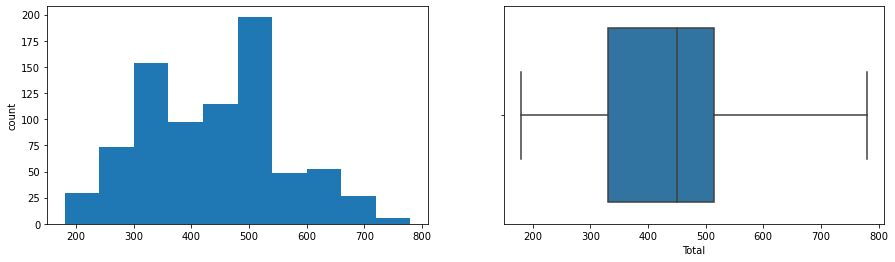

HP
Skew : 1.57


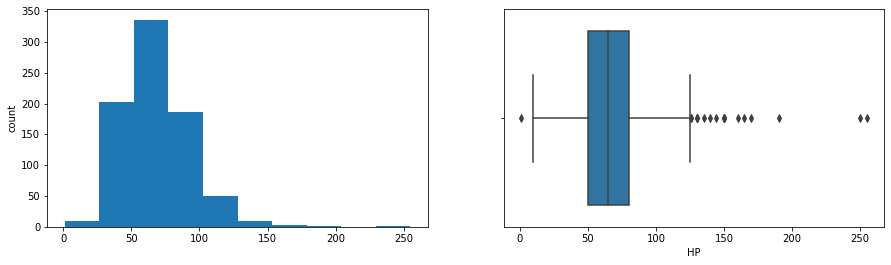

Attack
Skew : 0.55


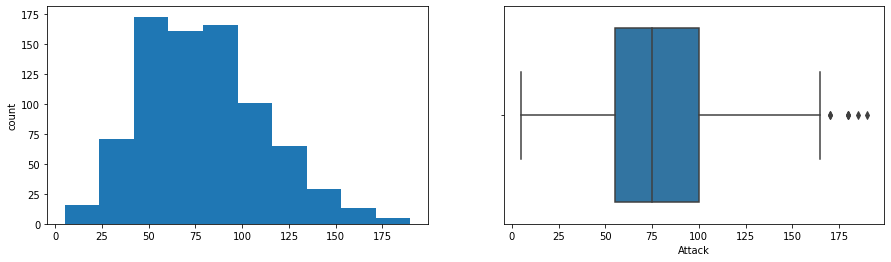

Defense
Skew : 1.16


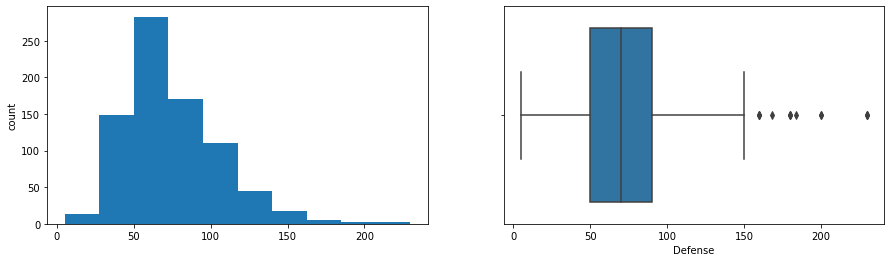

Sp. Atk
Skew : 0.74


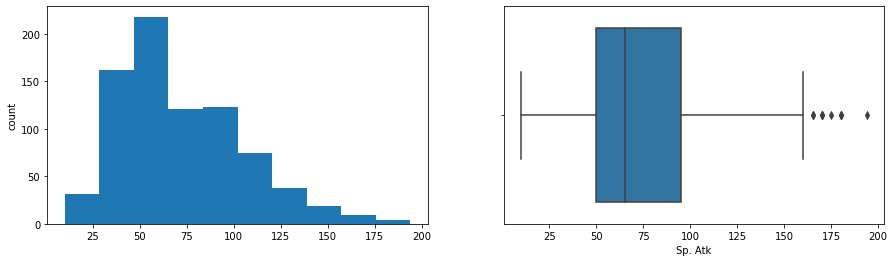

Sp. Def
Skew : 0.85


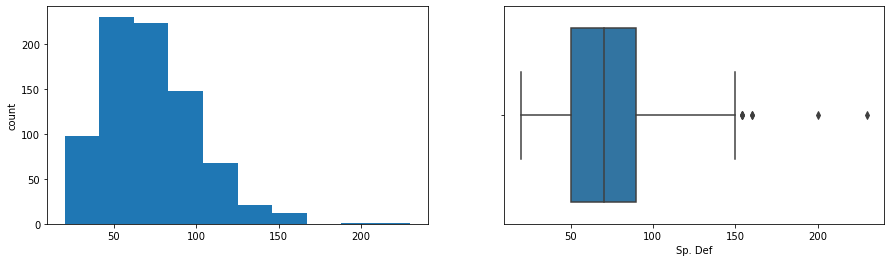

Speed
Skew : 0.36


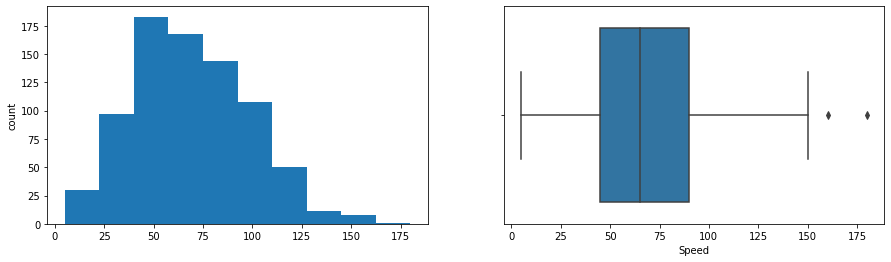

In [119]:
for col in data.columns[4:11]:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**
- Speed has the lowest skew of all the main stats, indicating that most pokemon will be around the same speed as each other
- Defense and HP both have a right skew showing that perhaps the more defensive stats on pokemon tend to have a focus on smaller values with some outliers having large values
- The total value of stats has the lowest skew of all, indicating that while pokemon may have outliers present on inidividual stats, the overall balance of their stats summated is close to the total stat value of other pokemon

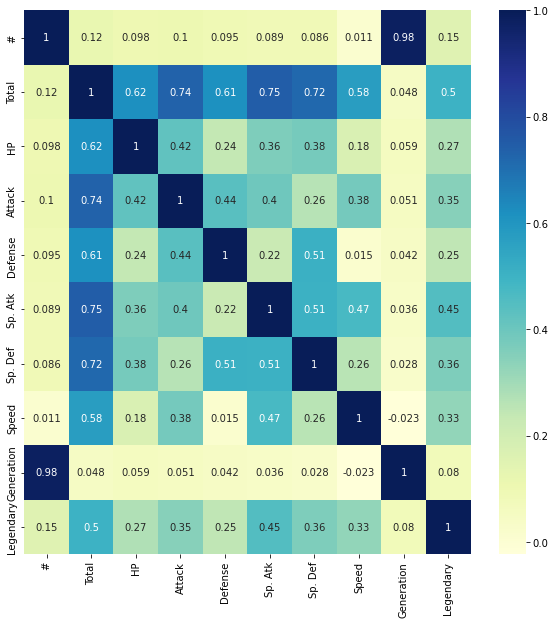

In [120]:
plt.figure(figsize  = (10,10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:**
    - Total has highest correlation among stats with Attack and Sp. Atk which makes sense considering these two stats are generally related to a pokemon's overall value in battle similar to total
    - # and generation have such a high correlation due to all the generational values being correlated with certain values of # (ex: all 1-150 are generation 1, and 151-251 are generation 2)
    - The physical stats have a lower correlation than the special stats
    - Speed has reasonable correlations with all other stats except defense, which is a near zero correlation

In [121]:
data_new = data.drop(columns=["#","Name","Type 1","Type 2","Generation","Legendary"])
#new below
data_try = data.drop(columns=["#","Name","Type 1","Type 2"])

In [122]:
#Scaling the data and storing the output as a new dataframe
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)

data_scaled.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853


In [123]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## K Means Clustering

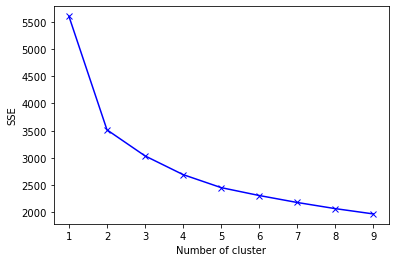

In [124]:
#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Our K clustering shows that from 2 to 9 there is no clear drop off point so any cluster number here could possibly be chosen. SO now we will test it with the silohuette score for comparison.

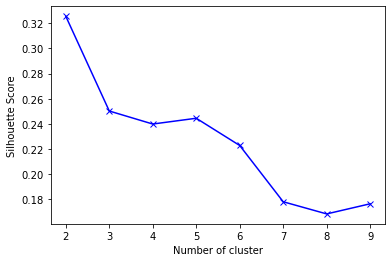

In [125]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

Our map shows a steep dropoff from 2 clusters so we will start with that number of clusters.

In [126]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)

In [127]:
data['KMeans_Labels'].value_counts()

0    422
1    378
Name: KMeans_Labels, dtype: int64

While it is not ideal to only have two clusters, the number of values seems to be appropriate for each cluster. Below, we check out the profiles of these clusters:

In [128]:
#Calculating mean and median of the original data for each label
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_0 Median,group_1 Median
#,383.026066,340.248677,386.0,317.0
Total,530.078199,329.071429,510.0,325.0
HP,82.706161,54.246032,80.0,52.5
Attack,97.533175,58.312169,95.0,56.5
Defense,89.367299,56.510582,85.0,50.0
Sp. Atk,90.905213,52.629630,90.0,50.0
Sp. Def,88.353081,53.537037,85.0,50.0
Speed,81.213270,53.835979,84.0,51.5
Generation,3.395735,3.243386,3.0,3.0
Legendary,0.154028,0.000000,0.0,0.0


**Observations:**

According to this profile it seems the first cluster is the pokemon with a higher average total of stats. Furthermore, the profile on Legendary shows us that every legendary pokemon is in the first cluster which makes sense considering that in the pokemon games the legendary pokemon always have higher base stat totals in comparison to the regular pokemon.

In order to confirm this we will also look at the box plots of the clusters:

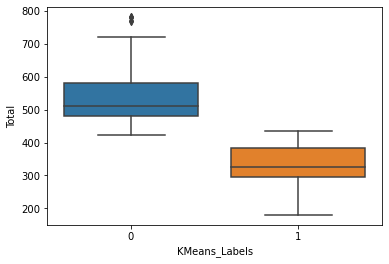

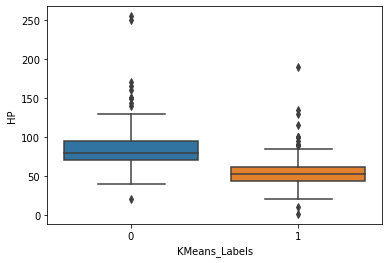

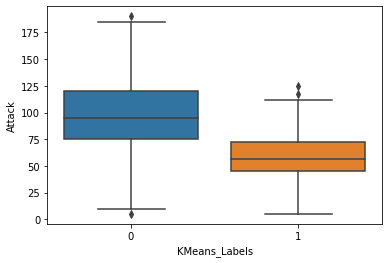

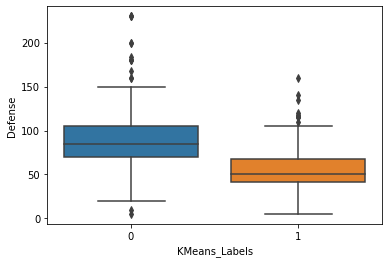

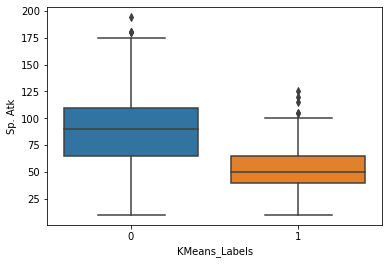

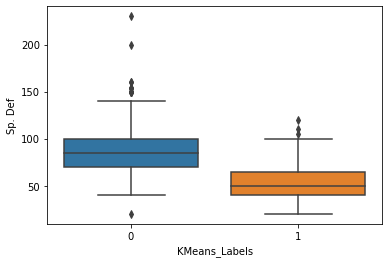

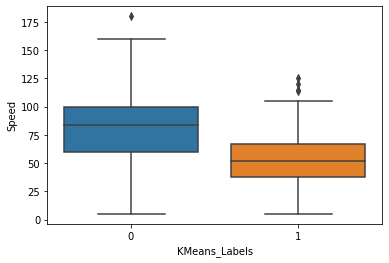

In [129]:
cols_visualise = ['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

**Observations:**

The box plots confirm what the profiles lead us to believe, that the first cluster is made up of all pokemon with higher base stat totals than the other pokemon cluster. This makes sense given the nature of the data too. To explain, in the games numerous pokemon have the ability to "evolve" into a stronger version of their species which is nearly always the next numerical pokemon and it always has a higher base stat total. That means for every evolutionary family of pokemon (at least half of pokemon have this evolutionary family, but not all), there is at least one pokemon guaranteed to have a higher base stat total than another. In other words, stat wise, not all pokemon are created equal.

**Everything below added for final exam submission**

## Decision Trees and Random Forest

In [130]:
from sklearn.preprocessing import StandardScaler
data.Legendary = data.Legendary.astype(float)
sample = np.random.choice(data_try.index, size=int(len(data)*0.8), replace=False)
train_data, test_data = data_try.iloc[sample], data_try.drop(sample)

#Creating columns
x_num=['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
x_cat=['Legendary']
x_cols=x_num + x_cat

x_train = train_data[x_cols]
x_train_num = train_data[x_num]
x_test = test_data[x_cols]

#Scaling the data
#sc=StandardScaler()
#X_train_num_scaled=sc.fit_transform(x_train_num)
#X_train_scaled=sc.fit_transform(x_train)
#X_train_scaled=pd.DataFrame(X_train_scaled, columns=x_num)
#X_train_scaled= X_train_scaled.np.concat(x_cat)


In [133]:
x_num=['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
x_cat=['Legendary']
x_cols=x_num + x_cat
x_cols

['Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Legendary']

Formed a test and train data sample out of the overall data. Transformed Legendary so it could be used in Keras functions later on.

In [134]:
RSEED = 399
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=RSEED, max_depth=200)
model_tree=tree.fit(train_data[x_cols],train_data.Generation)

Created a collection of columns we want to use to predict Generation number off of and made a decision tree based off of this.

In [135]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')
print(f'Model Accuracy: {tree.score(train_data[x_cols],train_data.Generation)}')

Decision tree has 643 nodes with maximum depth 27.
Model Accuracy: 0.9890625


A depth of 23 is fairly deep and is a strong indicator that this model is overfitting the data. Additionally, 617 nodes is a lot especially considering that Generation only has 6 possible values.

In [136]:
# Limit maximum depth and train
short_tree = DecisionTreeClassifier(max_depth = 5, random_state=RSEED)
short_tree.fit(train_data[x_cols],train_data.Generation)

print(f'Model Accuracy: {short_tree.score(train_data[x_cols],train_data.Generation)}')
print(f'Model Accuracy: {short_tree.score(test_data[x_cols],test_data.Generation)}')

Model Accuracy: 0.340625
Model Accuracy: 0.275


Our short tree results are definitely not overfitted.  Train had a low accuracy of about .345 and the test data had an even lower accuracy of .212.

[Text(713.3522727272727, 996.6, 'X[0] <= 250.5\ngini = 0.821\nsamples = 640\nvalue = [136, 86, 130, 101, 130, 57]'),
 Text(351.92045454545456, 815.4000000000001, 'X[0] <= 247.5\ngini = 0.745\nsamples = 36\nvalue = [4, 13, 10, 6, 0, 3]'),
 Text(247.29545454545456, 634.2, 'X[4] <= 31.0\ngini = 0.763\nsamples = 29\nvalue = [4, 7, 10, 5, 0, 3]'),
 Text(152.1818181818182, 453.0, 'X[5] <= 27.5\ngini = 0.725\nsamples = 20\nvalue = [4, 2, 8, 5, 0, 1]'),
 Text(76.0909090909091, 271.79999999999995, 'X[2] <= 32.5\ngini = 0.571\nsamples = 7\nvalue = [4, 1, 2, 0, 0, 0]'),
 Text(38.04545454545455, 90.59999999999991, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0, 0, 0]'),
 Text(114.13636363636364, 90.59999999999991, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2, 0, 0, 0]'),
 Text(228.27272727272728, 271.79999999999995, 'X[0] <= 242.0\ngini = 0.627\nsamples = 13\nvalue = [0, 1, 6, 5, 0, 1]'),
 Text(190.22727272727275, 90.59999999999991, 'gini = 0.612\nsamples = 11\nvalue = [0, 1, 6, 3, 0, 1]'),
 Text(2

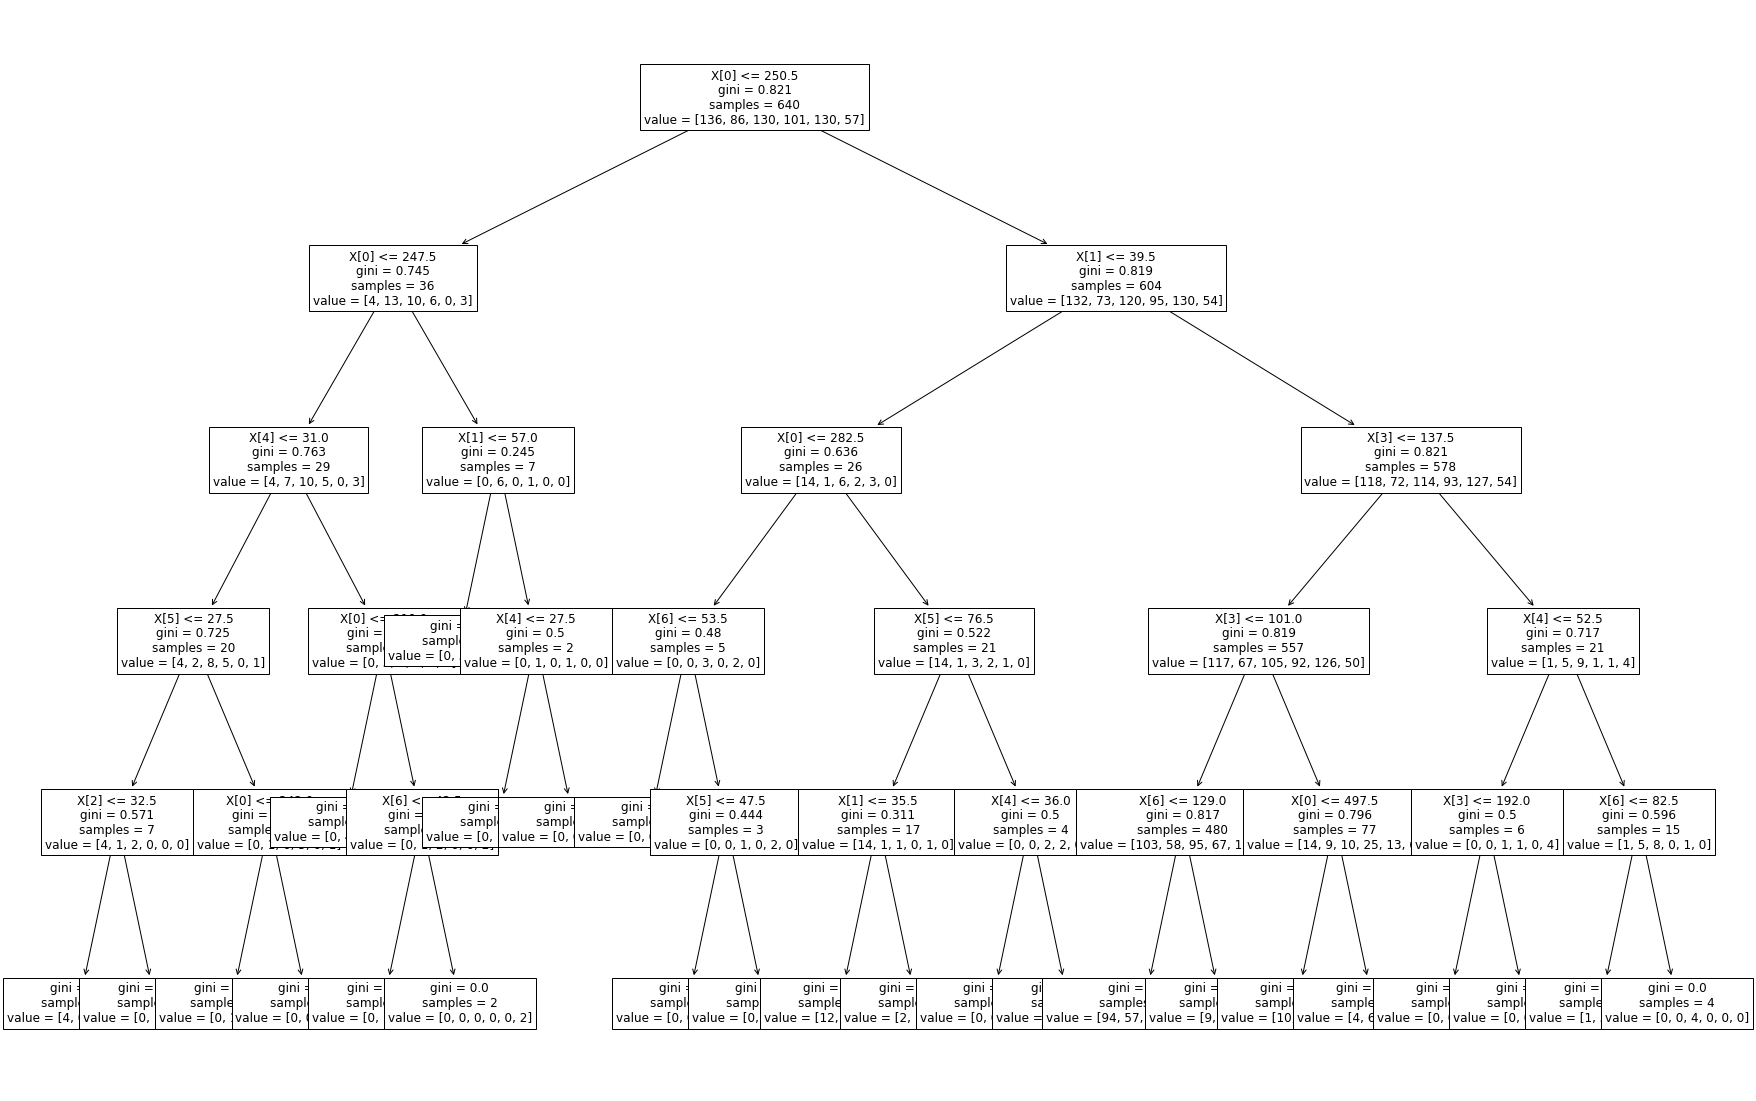

In [137]:
from sklearn import tree
fig2 = plt.figure(figsize=(30,20))
tree.plot_tree(short_tree, fontsize=12)

The gini coefficient at the top node shows that there is 82% chance that an observation does not have its generation correctly determined.

**Random Tree**

Now we will make a random forest, an ensemble of DTs where by making many of them we can reduce overall variance.

In [138]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_data.Generation, [1 for _ in range(len(test_data.Generation))], average = 'micro')
    baseline['precision'] = precision_score(test_data.Generation, [1 for _ in range(len(test_data.Generation))], average = 'micro')
   # baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_data.Generation, predictions, average = 'micro')
    results['precision'] = precision_score(test_data.Generation, predictions, average = 'micro')
    #results['roc'] = roc_auc_score(test_data.Generation, probs, multi_class='ovr')
    
    train_results = {}
    train_results['recall'] = recall_score(train_data.Generation, train_predictions, average = 'micro')
    train_results['precision'] = precision_score(train_data.Generation, train_predictions, average = 'micro')
   # train_results['roc'] = roc_auc_score(train_data.Generation, train_probs, multi_class='ovr')
    
    for metric in ['recall', 'precision']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    , multi_class='ovr'
    # Calculate false positive rates and true positive rates
   # base_fpr, base_tpr, _ = roc_curve(test_data.Generation, [1 for _ in range(len(test_data.Generation))])
    #model_fpr, model_tpr, _ = roc_curve(test_data.Generation, probs)

   # plt.figure(figsize = (8, 6))
   # plt.rcParams['font.size'] = 16
    
    # Plot both curves
   # plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    #plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    #plt.legend();
    #plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [139]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1,
                              class_weight='balanced')

# Fit on training data
model.fit(train_data[x_cols], train_data.Generation)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(class_weight='balanced', max_features='sqrt', n_jobs=-1,
                       random_state=399, verbose=1)

In [140]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 568
Average maximum depth 21


Here we can see that even in the forest, the DTs are still very deep.

## RF Results

In [141]:
train_rf_predictions = model.predict(train_data[x_cols])
train_rf_probs = model.predict_proba(train_data[x_cols])[:, 1]

rf_predictions = model.predict(test_data[x_cols])
rf_probs = model.predict_proba(test_data[x_cols])[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [142]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Recall Baseline: 0.19 Test: 0.31 Train: 0.99
Precision Baseline: 0.19 Test: 0.31 Train: 0.99


## Confusion Matrix

In [143]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: https://urldefense.com/v3/__http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html*5Cn__;JQ!!Epnw_ITfSMW4!sHhOvvoFU8L-m4Mtgu-SQPDV1DDshh4Z4DA8Q3T4e5f25JEflPqKweYfMvVhvehEusa95V17VCk-4cegruoE$     """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[15  1  6  3  4  1]
 [ 6  2  4  1  7  0]
 [10  4  9  3  3  1]
 [ 5  1  2  4  8  0]
 [ 5  1  7  6 16  0]
 [ 8  1  6  3  3  4]]


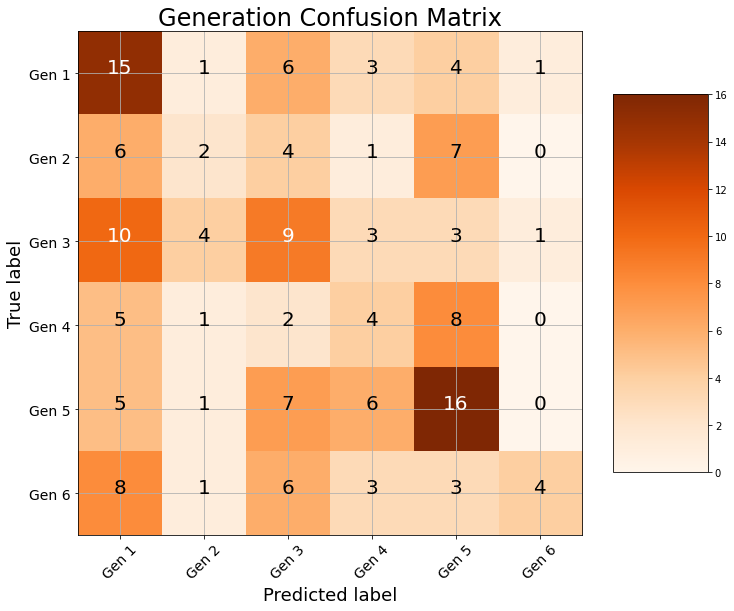

In [144]:
cm = confusion_matrix(test_data.Generation, rf_predictions)
plot_confusion_matrix(cm, classes = [ 'Gen 1', 'Gen 2','Gen 3','Gen 4','Gen 5','Gen 6'],
                      title = 'Generation Confusion Matrix')

Generations 1 and 4 seem to have the highest rate of accuracy. Generation 3 and 6 appear to have the lowest.

In [145]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [10, 30],
    'max_depth': [5,10,20],
    'min_samples_split': [2, 5],
    'bootstrap': [True, False],
    'class_weight':['balanced',None]
    
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = GridSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        verbose = 1)

# Fit 
rs.fit(train_data[x_cols], train_data.Generation)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=399),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', None],
                         'max_depth': [5, 10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [10, 30]},
             scoring='roc_auc', verbose=1)

In [146]:
rs.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 10}

In [147]:
best_model = rs.best_estimator_

In [148]:
train_rf_predictions = best_model.predict(train_data[x_cols])
train_rf_probs = best_model.predict_proba(train_data[x_cols])[:, 1]

rf_predictions = best_model.predict(test_data[x_cols])
rf_probs = best_model.predict_proba(test_data[x_cols])[:, 1]

In [149]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Recall Baseline: 0.19 Test: 0.28 Train: 0.51
Precision Baseline: 0.19 Test: 0.28 Train: 0.51


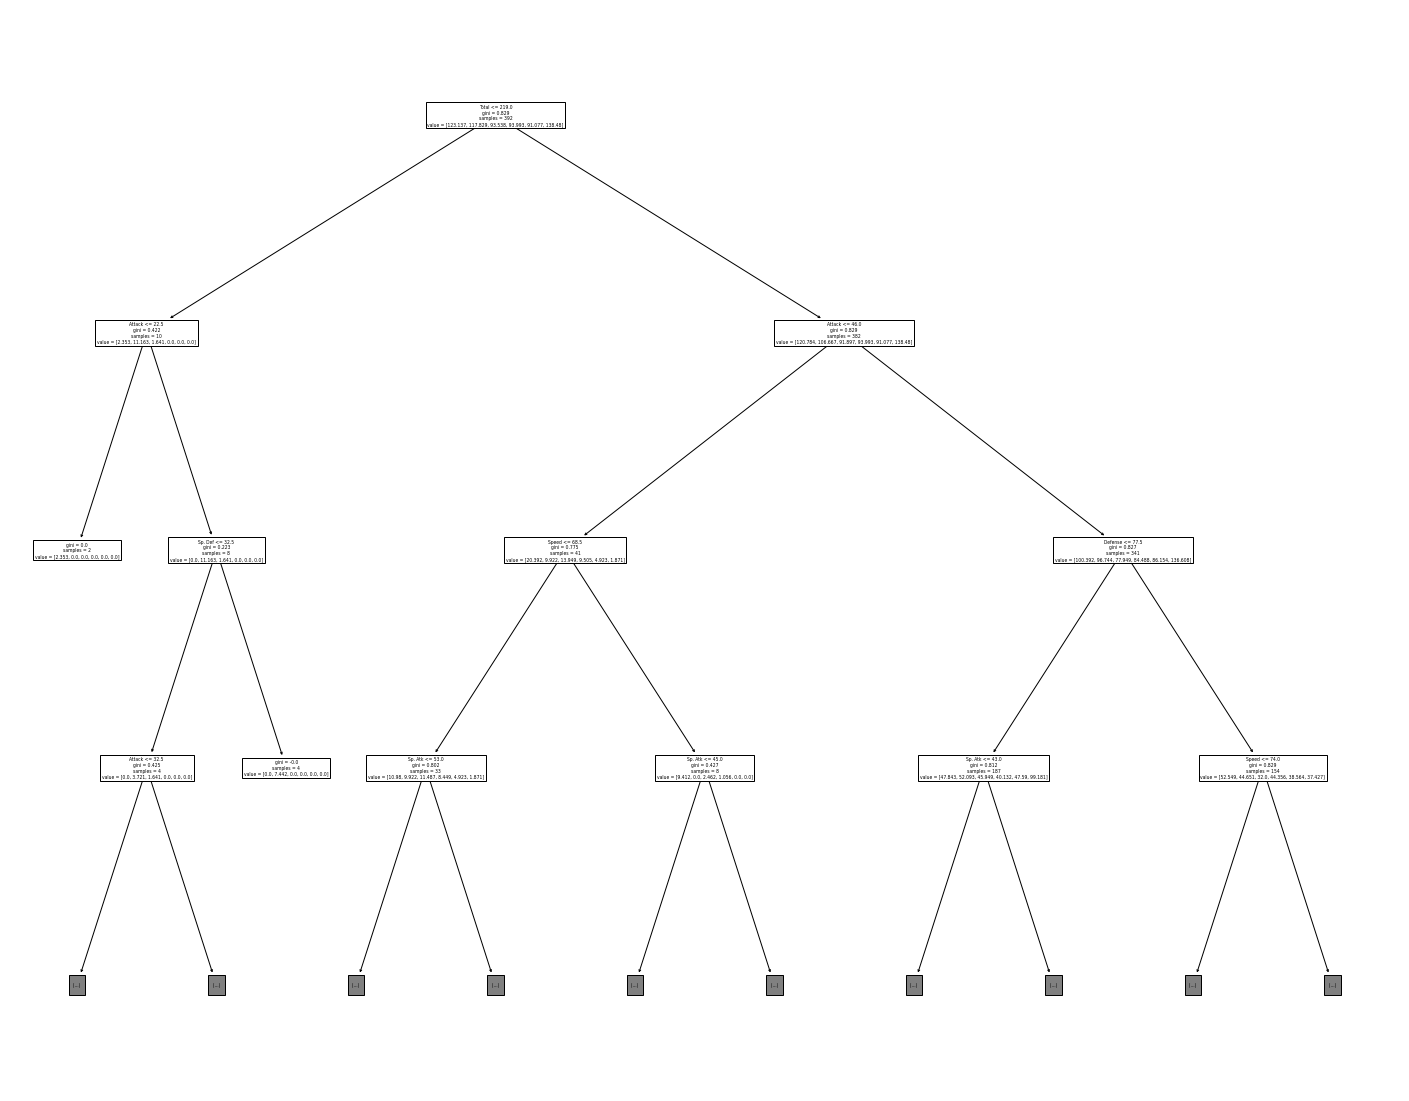

In [150]:
from sklearn import tree
features = list(train_data.columns)
estimator = best_model.estimators_[1]


fig = plt.figure(figsize=(25,20))
tree.plot_tree(estimator, max_depth=3, feature_names = features)
fig.savefig("tree_estimator.png")

A decision tree made off of the best model estimator.

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [152]:
import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

# Separate data and one-hot encode the output
# Note: We're also turning the data into numpy arrays, in order to train the model in Keras
features = np.array(train_data.drop('Generation', axis=1),dtype=np.float)
targets = np.array(keras.utils.np_utils.to_categorical(train_data['Generation'], 10),dtype=np.float)
features_test = np.array(test_data.drop('Generation', axis=1),dtype=np.float)
targets_test = np.array(keras.utils.np_utils.to_categorical(test_data['Generation'], 10),dtype=np.float)

print(features[:10])
print(targets[:10])

[[480.  65.  76.  84.  54.  96. 105.   0.]
 [485.  77. 120.  90.  60.  90.  48.   0.]
 [455.  65.  50.  35. 115.  95.  95.   0.]
 [590.  95.  75. 180. 130.  80.  30.   0.]
 [498.  75.  98.  63.  98.  63. 101.   0.]
 [442.  65.  90.  65.  61.  61. 100.   0.]
 [370.  70.  55.  75.  45.  65.  60.   0.]
 [475.  80. 100.  70.  60.  70.  95.   0.]
 [280.  55.  40.  40.  65.  45.  35.   0.]
 [320.  45.  50.  55.  75.  65.  30.   0.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Created arrays out of train in order to be able to run a neural network off of it.

In [153]:
print(test_data.shape)
print(train_data.shape)
print(features.shape)
print(targets.shape)

(160, 9)
(640, 9)
(640, 8)
(640, 10)


Checked the shapes of targets and features.

In [154]:
# Imports
import numpy as np
import keras as keras
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(8,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1152      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 10,058
Trainable params: 10,058
Non-trainable params: 0
_________________________________________________________________


In [155]:
# Training the model
#model.add(tensorflow.keras.layers.Dense(256, input_shape=(train_data.shape[10],), activation='sigmoid'))
model.fit(features, targets, epochs=200, batch_size=100, verbose=0)

In [156]:
# Evaluating the model on the training and testing set
score = model.evaluate(features, targets)
print("\n Training Accuracy:", score[1])
score = model.evaluate(features_test, targets_test)
print("\n Testing Accuracy:", score[1])

20/20 [==============================] - 0s 1ms/step - loss: 1.7525 - accuracy: 0.1953

 Training Accuracy: 0.1953125
5/5 [==============================] - 0s 1ms/step - loss: 1.7884 - accuracy: 0.1813

 Testing Accuracy: 0.18125000596046448


Overall, there may be an issue in using this particular dataset for random foresting and forming a neural network. It could form the basis for both types of models, but issues arose when evaluating its accuracy, which was extremely low.